In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('all')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import confusion_matrix,accuracy_score
from sklearn.svm import SVC
import re
from sklearn.metrics import classification_report

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [109]:
import pandas as pd
df=pd.read_csv('datathon_train.csv')
df.columns=['url','label']

In [110]:
df=df.dropna(axis=0,how='all')
df.isnull()

,url,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
100854,False,False
100855,False,False
100856,False,False
100857,False,False


In [111]:
df.head()

,url,label
0,http://yasli-sad.ru/css/chase/chaseall%20newin...,1.0
1,http://denizkent.net/wp-admin/js/login.alibaba...,1.0
2,http://www.marketbiz.net/mbz/wp-includes/js/jq...,1.0
3,http://guardiaoitau30horas.uniclassdispositivo...,1.0
4,http://chancejumpers.com/christmas/christmas-h...,0.0


In [120]:
df['url'] = df['url'].map(lambda x:x.replace('//', ' '))
df['url'] = df['url'].map(lambda x:x.replace('/', ' '))
df['url'] = df['url'].map(lambda x:x.replace('-', ' '))
df['url'] = df['url'].map(lambda x:x.replace('.', ' '))
df['url'] = df['url'].map(lambda x:x.replace(',',' '))


In [122]:
df

,url,label
0,http yasli sad ru css chase chaseall%20newinf...,1.0
1,http denizkent net wp admin js login alibaba com,1.0
2,http www marketbiz net mbz wp includes js jqu...,1.0
3,http guardiaoitau30horas uniclassdispositivos...,1.0
4,http chancejumpers com christmas christmas ho...,0.0
...,...,...
100854,http crop topsnn oucreate com grn,1.0
100855,http jacksonvillenursinghomelawyers com Drive...,1.0
100856,http www smallappliance com product asp?cur=U...,0.0
100857,http www skofija novomesto si,0.0


In [123]:
x=df['url']
y=df['label']

In [125]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=100)

In [126]:
x_train

6236              http  dockpenguins darkbb com t27647 xat
57476    http  alfisilver com wp includes alibaba vqcr8...
32581         https  sites google com site wwwpages20 home
94543                                   https  mit gov jo 
30320    http  www undercoverexperience co uk index php...
                               ...                        
37407                               https  www epoxi info 
26418    http  lansingtradecompanyltd yolasite com say ...
80808                                    http  saut org sa
53634        http  www 2cvtv co uk event history 2008 html
44252                                    http  sem40 co il
Name: url, Length: 70601, dtype: object

In [127]:
tfidf=TfidfVectorizer(ngram_range=(1,3),lowercase=True,max_features=5000)
x_train_vector=tfidf.fit_transform(x_train)
x_test_vector=tfidf.transform(x_test)


In [128]:
x_train_vector


<70601x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 505871 stored elements in Compressed Sparse Row format>

In [130]:
#using naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train_vector,y_train)
y_pred=classifier.predict(x_test_vector)
y_pred


array([1., 0., 0., ..., 0., 1., 0.])

In [132]:
from sklearn.metrics  import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     20503
         1.0       0.96      0.72      0.82      9755

    accuracy                           0.90     30258
   macro avg       0.92      0.85      0.88     30258
weighted avg       0.91      0.90      0.90     30258



[[20227   276]
 [ 2719  7036]]


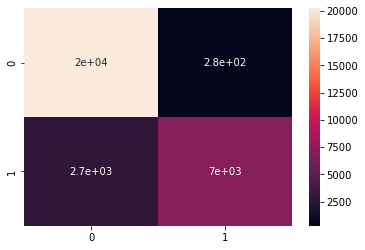

In [134]:
#confusion matrix for naive bayes
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(cm)




In [135]:
#calculating the accuracy of naive bayes model
print(accuracy_score(y_test,y_pred))

0.9010179126181506
